In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import nltk
import plotly.express as px
from collections import Counter

In [11]:
#Setting ggplot style of matplotlib for plots
plt.style.use("ggplot")

In [12]:
#Imported dataset
df = pd.read_csv("train.csv")
df

textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  
0                    I`d have responded, if I were going   neutral  
1                                               Sooo SAD  negative  
2                                            bullying me  negative  
3                                         leave me alone  negative  
4                                          Sons of ****,  negative  
...                                                  ...       ...  
27476                                             d lost  negative  
27477                                      , don`t force  negative  
27478                          Yay good for both of you.  positive  
27479                         But it was worth it  ****.  positive  
27480  All this flirting going on - The ATG smiles. Y...   neutral  

[27481 rows x 4 columns]

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Top 5 rows displayed
df.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative

In [15]:
df['text'].values[0]

' I`d have responded, if I were going'

In [16]:
#number of rows and columns
print(df.shape)

(27481, 4)


In [17]:
for i in df:
    df["text_length"] = df["text"].str.len()
    df["selected_text_length"] = df["selected_text"].str.len()
    df["difference_in_words"] = df["text_length"] - df["selected_text_length"]

In [18]:
#entries of each cell in column sentiment is listed here
df['sentiment']

0         neutral
1        negative
2        negative
3        negative
4        negative
           ...   
27476    negative
27477    negative
27478    positive
27479    positive
27480     neutral
Name: sentiment, Length: 27481, dtype: object

In [19]:
#on the basis of entries values are counted by using 'value_counts()' function
df['sentiment'].value_counts()

sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64

sort_index() function is used to sort the index labels of Pandas Dataframe

In [20]:
#index labels are sorted in ascending order by default via sort_index() function
df['sentiment'].value_counts().sort_index()

sentiment
negative     7781
neutral     11118
positive     8582
Name: count, dtype: int64

#EDA

In [21]:
temp = df.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

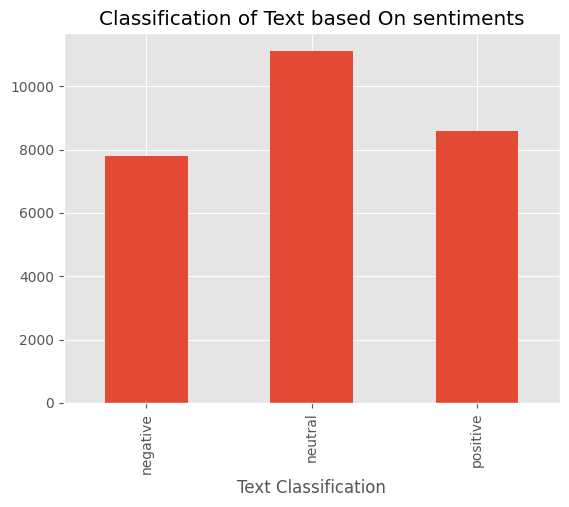

In [22]:
ax=df['sentiment'].value_counts().sort_index().plot(kind='bar',title='Classification of Text based On sentiments')

ax.set_xlabel("Text Classification")
plt.show()

In [23]:
hist_data = [df['text_length'],df['selected_text_length']]

group_labels = ['Selected_Text', 'Text']

fig = ff.create_distplot(hist_data, group_labels,show_curve=False)
fig.update_layout(title_text='Distribution of Number Of words')
fig.update_layout(
    autosize=False,
    width=900,
    height=700,
    paper_bgcolor="LightSteelBlue",
)
fig.show()

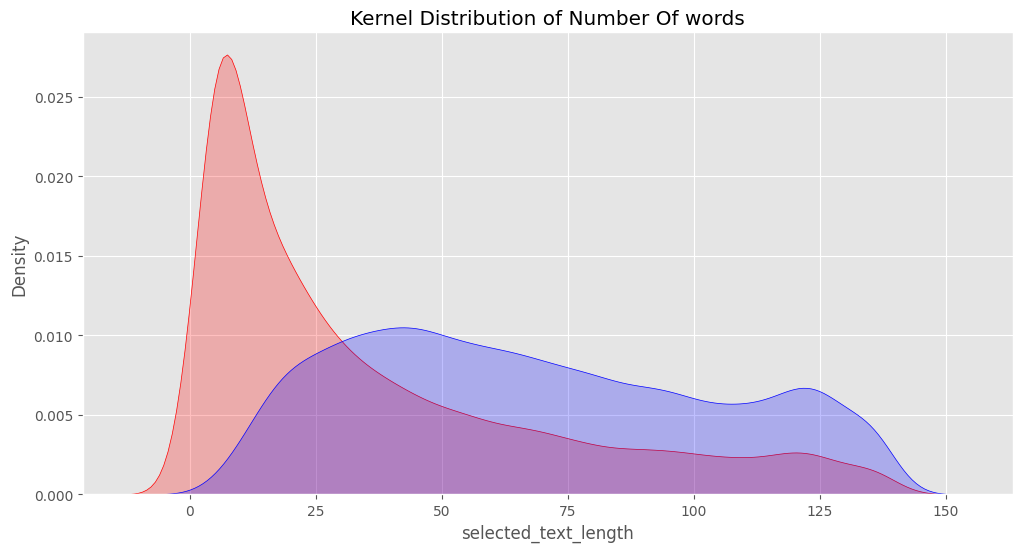

In [24]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(df['selected_text_length'], fill=True, color="r").set_title('Kernel Distribution of Number Of words')
p1=sns.kdeplot(df['text_length'], fill=True, color="b")

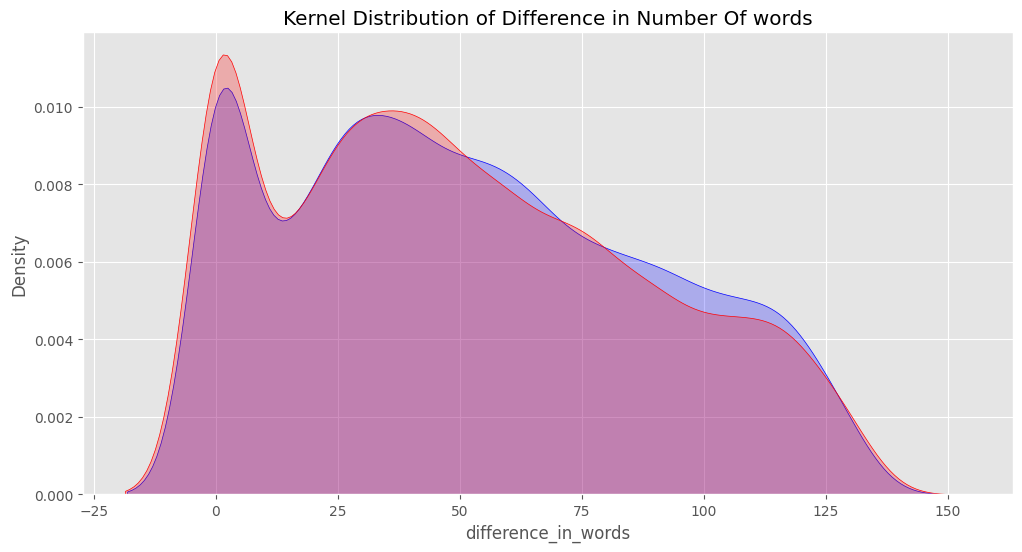

In [25]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(df[df['sentiment']=='positive']['difference_in_words'], fill=True, color="b").set_title('Kernel Distribution of Difference in Number Of words')
p2=sns.kdeplot(df[df['sentiment']=='negative']['difference_in_words'], fill=True, color="r")

<Axes: xlabel='difference_in_words', ylabel='Count'>

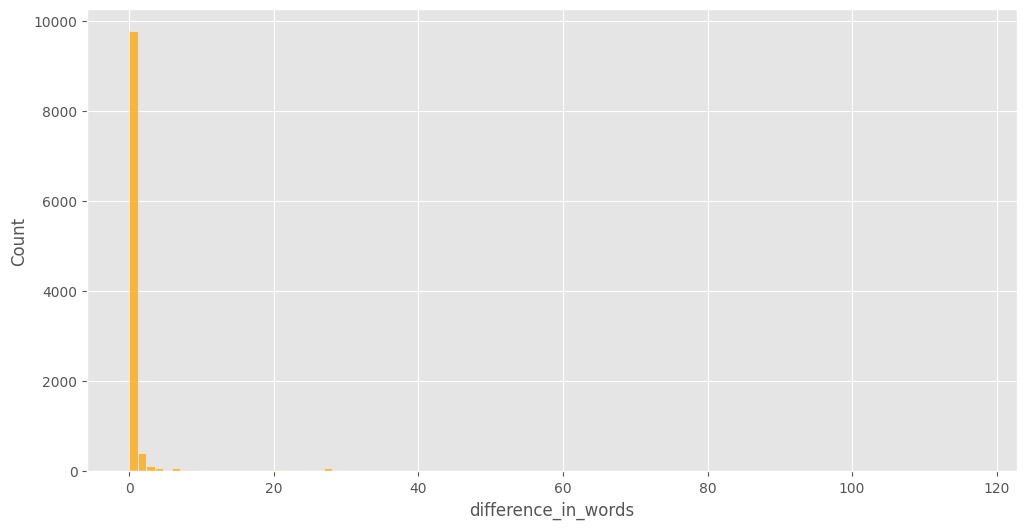

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['sentiment']=='neutral']['difference_in_words'],kde=False,color='orange',bins=100)

In [27]:
df['temp_list'] = df['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [28]:
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

In [29]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [30]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [31]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [32]:
Positive_sent = df[df['sentiment']=='positive']
Negative_sent = df[df['sentiment']=='negative']
Neutral_sent = df[df['sentiment']=='neutral']

In [33]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

In [34]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [35]:
#Most common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

In [36]:
fig = px.treemap(temp_neutral, path=['Common_words'], values='count',title='Tree Of Most Common Neutral Words')
fig.show()

In [37]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [38]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

In [39]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

In [67]:
example = df['text'][50]
print(example)

 Then you should check out http://twittersucks.com and connect with other tweeple who hate twitter


In [41]:
#punkt model of nltk is downloaded as it is the recommended sentence word tokenizer for english text in nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [42]:
#sentence is separated in parts
tokens=nltk.word_tokenize(example)
tokens[:10]

['4am', '.', 'And', 'Im', 'on', 'the', 'beach', '.', 'Pretty']

In [43]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [44]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('4am', 'CD'),
 ('.', '.'),
 ('And', 'CC'),
 ('Im', 'NNP'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('beach', 'NN'),
 ('.', '.'),
 ('Pretty', 'VB')]

In [45]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

# VADER = Valence Aware Dictionary and Sentiment Reasoner

- uses 'bag of words' approach
  -->stop words are removed
  -->each word is scored and combined to total score

In [46]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from nltk.sentiment.vader import VaderConstants

In [47]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [48]:
sia=SentimentIntensityAnalyzer()

In [49]:
#Sentiment Intensity Analyser Object
sia

In [50]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.4939}

In [51]:
sia.polarity_scores(df['text'][200])

{'neg': 0.223, 'neu': 0.777, 'pos': 0.0, 'compound': -0.3182}

Using 'polarity_score' function for whole dataset

In [52]:
df

textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  \
0                    I`d have responded, if I were going   neutral   
1                                               Sooo SAD  negative   
2                                            bullying me  negative   
3                                         leave me alone  negative   
4                                          Sons of ****,  negative   
...                                                  ...       ...   
27476                                             d lost  negative   
27477                                      , don`t force  negative   
27478                          Yay good for both of you.  positive   
27479                         But it was worth it  ****.  positive   
27480  All this flirting going on - The ATG smiles. Y...   neutral   

       text_length  selected_text_length  difference_in_words  \
0             36.0                  35.0                  1.0   
1             46.0                   8.0                 38.0   
2             25.0                  11.0                 14.0   
3             31.0                  14.0                 17.0   
4             75.0                  13.0                 62.0   
...            ...                   ...                  ...   
27476         77.0                   6.0                 71.0   
27477        122.0                  13.0                109.0   
27478        111.0                  25.0                 86.0   
27479         27.0                  26.0                  1.0   
27480         62.0                  58.0                  4.0   

                                               temp_list  
0            [I`d, have, responded,, if, I, were, going]  
1                                            [Sooo, SAD]  
2                                         [bullying, me]  
3                                     [leave, me, alone]  
4                                      [Sons, of, ****,]  
...                                                  ...  
27476                                          [d, lost]  
27477                                  [,, don`t, force]  
27478                   [Yay, good, for, both, of, you.]  
27479                   [But, it, was, worth, it, ****.]  
27480  [All, this, flirting, going, on, -, The, ATG, ...  

[27481 rows x 8 columns]

In [53]:
#TryCatch block is used to avoid exceptions and catch log errors
results = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        txt = row['selected_text']
        textId = row['textID']
        results[textId] = sia.polarity_scores(txt)
    except KeyError:
        print(f"Error: Missing data for row {i}")
    except Exception as e:
        print(f"Error processing row {i}: {e}")

  0%|          | 0/27481 [00:00<?, ?it/s]

Error processing row 314: 'float' object has no attribute 'encode'


In [54]:
pd.DataFrame(results)

cb774db0d1  549e992a42  088c60f138  9642c003ef  358bd9e861  \
neg              0.0      0.7930      0.7960       0.762         0.0   
neu              1.0      0.2070      0.2040       0.238         1.0   
pos              0.0      0.0000      0.0000       0.000         0.0   
compound         0.0     -0.5904     -0.5994      -0.296         0.0   

          28b57f3990  6e0c6d75b1  50e14c0bb8  e050245fbd  fc2cbefa9d  ...  \
neg           0.1540      0.0000         0.0         0.0         0.0  ...   
neu           0.5770      0.0000         1.0         1.0         1.0  ...   
pos           0.2690      1.0000         0.0         0.0         0.0  ...   
compound      0.4215      0.5106         0.0         0.0         0.0  ...   

          15bb120f57  8f5adc47ec  a208770a32  8f14bb2715  b78ec00df5  \
neg            0.095         0.0         0.0      0.0000      0.0000   
neu            0.905         1.0         1.0      0.4080      0.0000   
pos            0.000         0.0         0.0      0.5920      1.0000   
compound      -0.296         0.0         0.0      0.4404      0.4939   

          4eac33d1c0  4f4c4fc327  f67aae2310  ed167662a5  6f7127d9d7  
neg           1.0000         0.0       0.000      0.0000      0.0000  
neu           0.0000         1.0       0.388      0.6800      0.4580  
pos           0.0000         0.0       0.612      0.3200      0.5420  
compound     -0.3182         0.0       0.743      0.3291      0.8074  

[4 rows x 27480 columns]

In [55]:
#To flip horizontally
pd.DataFrame(results).T

neg    neu    pos  compound
cb774db0d1  0.000  1.000  0.000    0.0000
549e992a42  0.793  0.207  0.000   -0.5904
088c60f138  0.796  0.204  0.000   -0.5994
9642c003ef  0.762  0.238  0.000   -0.2960
358bd9e861  0.000  1.000  0.000    0.0000
...           ...    ...    ...       ...
4eac33d1c0  1.000  0.000  0.000   -0.3182
4f4c4fc327  0.000  1.000  0.000    0.0000
f67aae2310  0.000  0.388  0.612    0.7430
ed167662a5  0.000  0.680  0.320    0.3291
6f7127d9d7  0.000  0.458  0.542    0.8074

[27480 rows x 4 columns]

In [56]:
vaders = pd.DataFrame(results).T
vaders=vaders.reset_index().rename(columns={'index':'textID'})
vaders= vaders.merge(df,how='left')

In [57]:
#sentiment score and metadata is here
vaders.head()

textID    neg    neu  pos  compound  \
0  cb774db0d1  0.000  1.000  0.0    0.0000   
1  549e992a42  0.793  0.207  0.0   -0.5904   
2  088c60f138  0.796  0.204  0.0   -0.5994   
3  9642c003ef  0.762  0.238  0.0   -0.2960   
4  358bd9e861  0.000  1.000  0.0    0.0000   

                                                text  \
0                I`d have responded, if I were going   
1      Sooo SAD I will miss you here in San Diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  text_length  \
0  I`d have responded, if I were going   neutral         36.0   
1                             Sooo SAD  negative         46.0   
2                          bullying me  negative         25.0   
3                       leave me alone  negative         31.0   
4                        Sons of ****,  negative         75.0   

   selected_text_length  difference_in_words  \
0                  35.0                  1.0   
1                   8.0                 38.0   
2                  11.0                 14.0   
3                  14.0                 17.0   
4                  13.0                 62.0   

                                     temp_list  
0  [I`d, have, responded,, if, I, were, going]  
1                                  [Sooo, SAD]  
2                               [bullying, me]  
3                           [leave, me, alone]  
4                            [Sons, of, ****,]

# Plot Vader Results

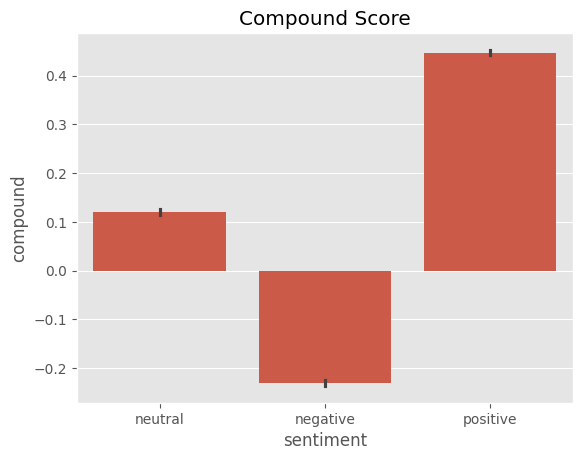

In [58]:
ax=sns.barplot(data=vaders,x='sentiment',y='compound')
ax.set_title('Compound Score')
plt.show()

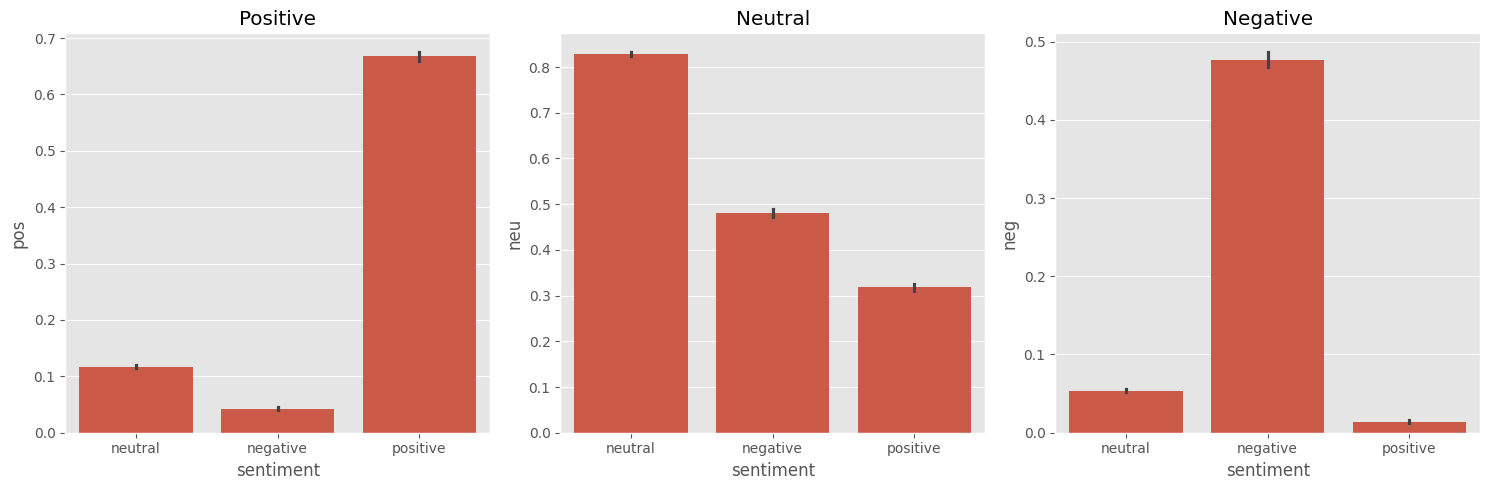

In [59]:
fig,axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(ax=axs[0],data=vaders,x='sentiment', y='pos')
sns.barplot(ax=axs[1],data=vaders,x='sentiment', y='neu')
sns.barplot(ax=axs[2],data=vaders,x='sentiment', y='neg')
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Roberta Model
A Pre-trained Model for Sentiment Analysis

In [60]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [61]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [62]:
print(example)
sia.polarity_scores(example)

4am. And Im on the beach. Pretty


{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.4939}

In [63]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.003629387, 'roberta_neu': 0.13121685, 'roberta_pos': 0.8651538}


In [64]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [65]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['text']
        myid = row['textID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except Exception as e:
        print(f"Broke for id {myid}")
        print(e)

  0%|          | 0/27481 [00:00<?, ?it/s]

Broke for id fdb77c3752
'float' object has no attribute 'encode'


In [96]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
df['Id'] = df['textID']
results_df = results_df.merge(df, how='left', on='Id')

In [97]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'textID', 'text',
       'selected_text', 'sentiment', 'text_length', 'selected_text_length',
       'difference_in_words', 'temp_list'],
      dtype='object')

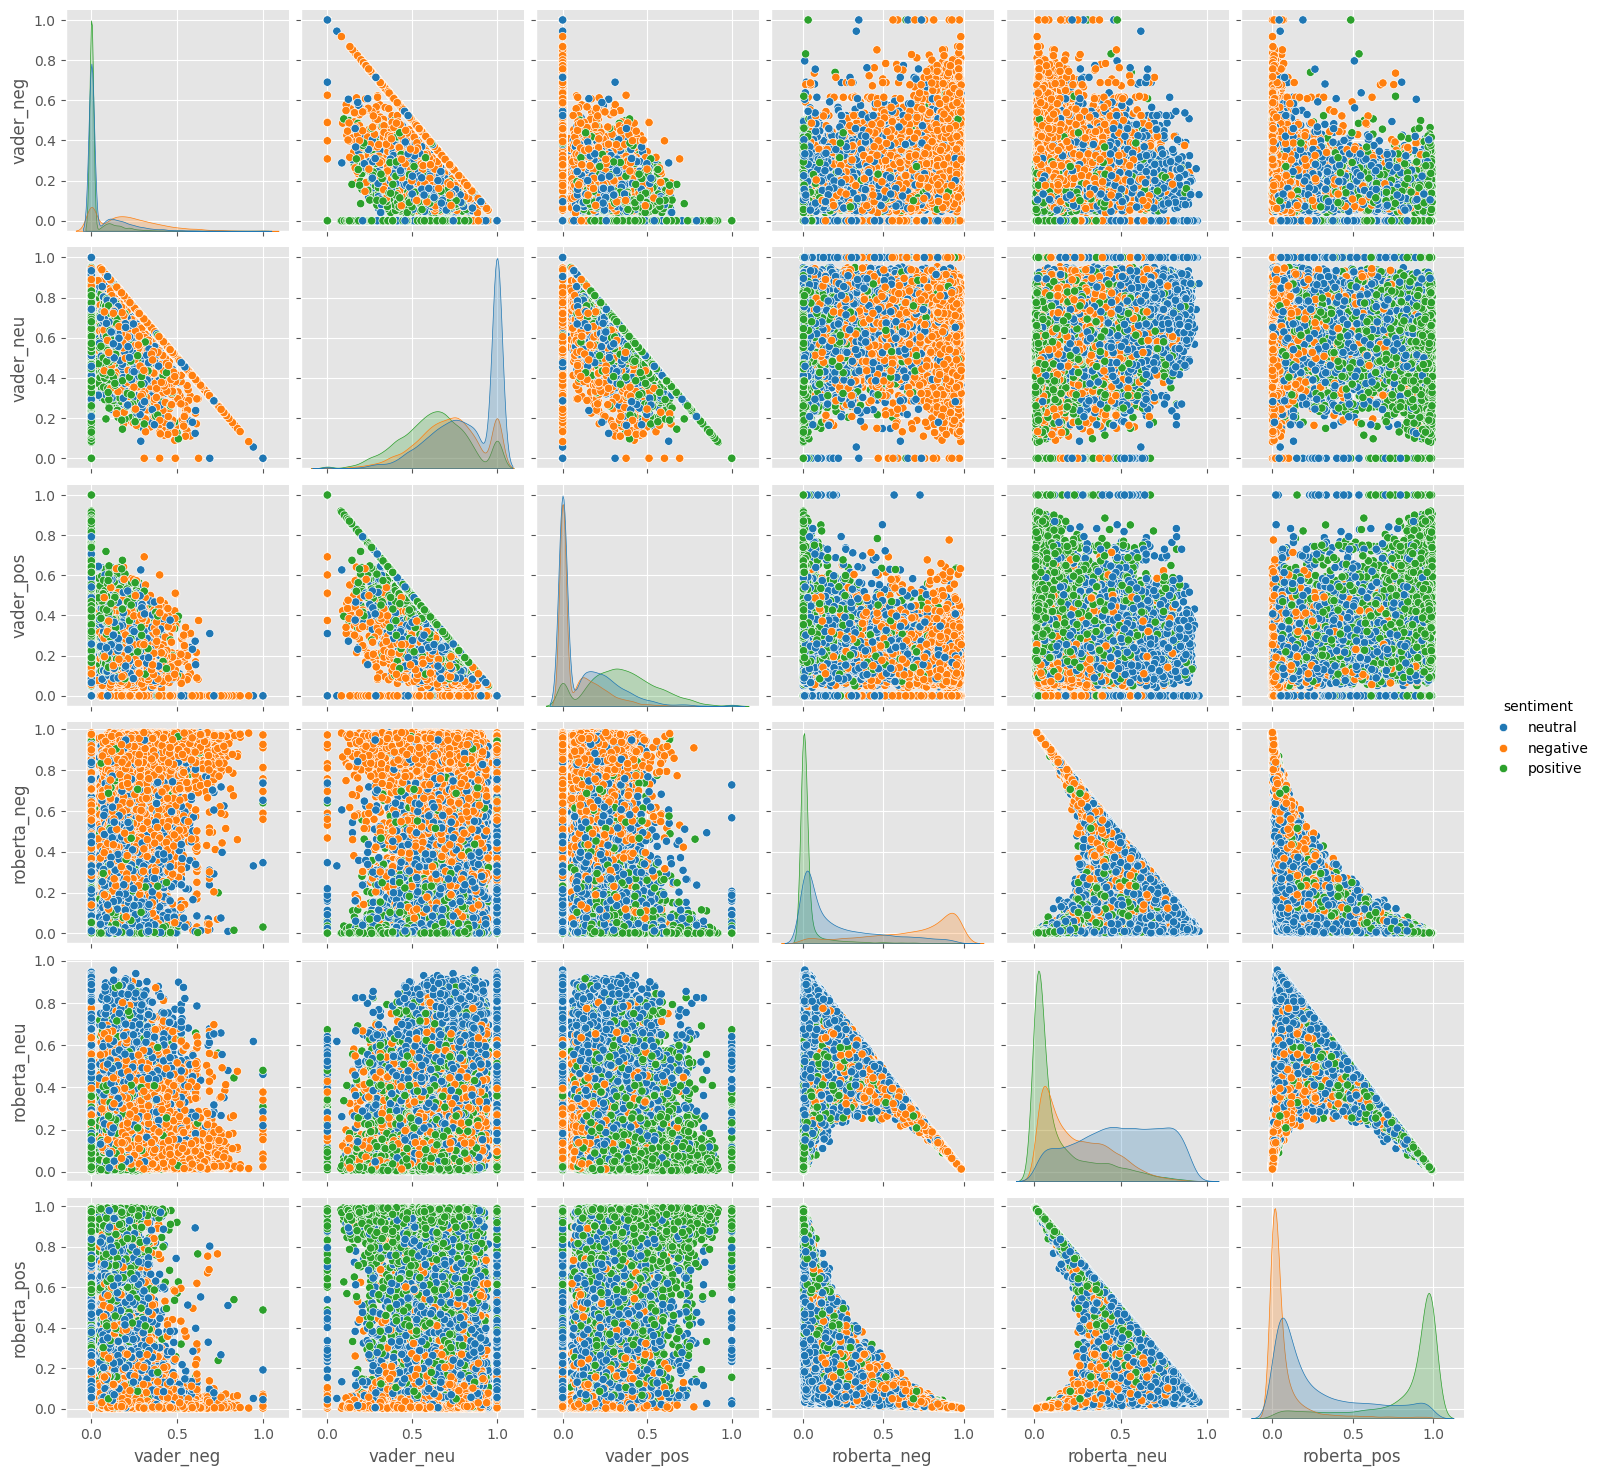

In [98]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='sentiment',
            palette='tab10')
plt.show()

In [117]:
import tweepy

auth = tweepy.OAuthHandler("cedqNvgKrM6j1rBXuJ7iXtYgx", "dATcRSrwpYQAoiDGipC6jKVo1mpJMko0DGVEx8eEJMuy3NOALn")
auth.set_access_token("1338352712237236224-qGbzWho5z2lw1wgbXKIgP4wwgaQOWH", "qKAVsvhNGz70B8zh1b2iHuD1PdicixuG0uns6NjuvJnMp")
api = tweepy.API(auth)

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'Negative' : scores[0],
        'Neutral' : scores[1],
        'Positive' : scores[2]
    }
    sentiment = max(scores_dict, key=scores_dict.get)
    score = scores_dict[sentiment]
    return sentiment,score

def analyze_tweets(query, count=10):
    tweets = api.search_tweets(q=query, count=count)
    for tweet in tweets:
        text = tweet
        sentiment,Score = polarity_scores_roberta(text)
        print(f"Tweet: {text}")
        print(f"Sentiment: {sentiment} \n(Score: {Score})")
        print()

analyze_tweets("random")

Tweet: ...celebrated by spilling half my soup. Hello, 40 calorie lunch.    Can it be the weekend now, please?
Sentiment: Neutral 
(Score: 0.4025569558143616)

Tweet:  No, rather we`re OMG it`s nearly Monday
Sentiment: Neutral 
(Score: 0.5116844177246094)

Tweet: I think I`m gonna try to go vegetarian again....and no soda and majorly cutback on beer...too many carbs....but its so yummyyy
Sentiment: Positive 
(Score: 0.9791410565376282)

Tweet:  I would if I was drivin :\ hahaha. but get me a Carol C. Special, yeah?
Sentiment: Positive 
(Score: 0.6314947605133057)

Tweet:   haha soooo party tonight???
Sentiment: Positive 
(Score: 0.6846574544906616)

Tweet: Forced to eat red hotdogs coz I`m starving and there`s nothing else for breakfast. Ick.
Sentiment: Negative 
(Score: 0.7402154803276062)

Tweet: Goodmorning world!
Sentiment: Positive 
(Score: 0.9198259115219116)

Tweet:  Sounds Fun!
Sentiment: Positive 
(Score: 0.9554480910301208)

Tweet: In my nice big bed....ipod on play....soft mu